In [1]:
using Polylogarithms
setprecision(200)

H(n) = harmonic(big(n))

function f(x)
    maxint = round(BigInt, exp(big(200)))
    a, b = one(BigInt), maxint
    @assert H(a) < x
    @assert H(b) ≥ x
    maxiters = 2floor(Int, log2(maxint))
    for _ in 1:maxiters
        a + 1 == b && break
        c = a + (b - a) ÷ 2
        if H(a) < x ≤ H(c)
            b = c
        else
            a = c
        end
    end
    (x = x, n = b, harmonic_num = H(b))
end

ENV["LINES"] = 256
[f(n) for n in 2:100]

99-element Vector{NamedTuple{(:x, :n, :harmonic_num), Tuple{Int64, BigInt, BigFloat}}}:
 (x = 2, n = 4, harmonic_num = 2.083333333333333333333333333333333333333333333333333333333335)
 (x = 3, n = 11, harmonic_num = 3.019877344877344877344877344877344877344877344877344877344878)
 (x = 4, n = 31, harmonic_num = 4.0272451954365201027598381802534095707393209246497123681072407)
 (x = 5, n = 83, harmonic_num = 5.0020682726801660537283247507538702643454552155664385874789896)
 (x = 6, n = 227, harmonic_num = 6.0043667083455660233764362171574084746508937713055123369847715)
 (x = 7, n = 616, harmonic_num = 7.0012740971341603814870689330229450748640483096748525357211127)
 (x = 8, n = 1674, harmonic_num = 8.0004855719957790677903047965196974458003419278834083891726504)
 (x = 9, n = 4550, harmonic_num = 9.0002080629311403391641795012689286242687992754000959959325923)
 (x = 10, n = 12367, harmonic_num = 10.00004300827580769470675707492981720768686887243344211163999)
 (x = 11, n = 33617, harmonic_num

In [2]:
using SpecialFunctions

harmonic_naive(n) = sum(inv, Base.OneTo(n))
harmonic_digamma(n) = digamma(n + 1) - digamma(1)

harmonic_digamma (generic function with 1 method)

In [3]:
harmonic_naive(10)

2.9289682539682538

In [4]:
harmonic_digamma(10)

2.928968253968253

In [5]:
[(n, harmonic_digamma(n) - harmonic_naive(n)) for n in 1:20]

20-element Vector{Tuple{Int64, Float64}}:
 (1, 4.440892098500626e-16)
 (2, 2.220446049250313e-16)
 (3, 2.220446049250313e-16)
 (4, 4.440892098500626e-16)
 (5, 4.440892098500626e-16)
 (6, 4.440892098500626e-16)
 (7, -1.3322676295501878e-15)
 (8, -8.881784197001252e-16)
 (9, -8.881784197001252e-16)
 (10, -8.881784197001252e-16)
 (11, -8.881784197001252e-16)
 (12, -1.3322676295501878e-15)
 (13, -1.7763568394002505e-15)
 (14, -1.7763568394002505e-15)
 (15, -1.7763568394002505e-15)
 (16, -1.7763568394002505e-15)
 (17, -1.7763568394002505e-15)
 (18, -1.7763568394002505e-15)
 (19, -2.220446049250313e-15)
 (20, -1.7763568394002505e-15)

In [6]:
[(2^n, harmonic_digamma(2^n) - harmonic_naive(2^n)) for n in 1:20]

20-element Vector{Tuple{Int64, Float64}}:
 (2, 2.220446049250313e-16)
 (4, 4.440892098500626e-16)
 (8, -8.881784197001252e-16)
 (16, -1.7763568394002505e-15)
 (32, -8.881784197001252e-16)
 (64, -1.7763568394002505e-15)
 (128, -8.881784197001252e-16)
 (256, 0.0)
 (512, -1.7763568394002505e-15)
 (1024, 0.0)
 (2048, 0.0)
 (4096, 0.0)
 (8192, 0.0)
 (16384, 0.0)
 (32768, 0.0)
 (65536, 0.0)
 (131072, -1.7763568394002505e-15)
 (262144, -1.7763568394002505e-15)
 (524288, -1.7763568394002505e-15)
 (1048576, -1.7763568394002505e-15)

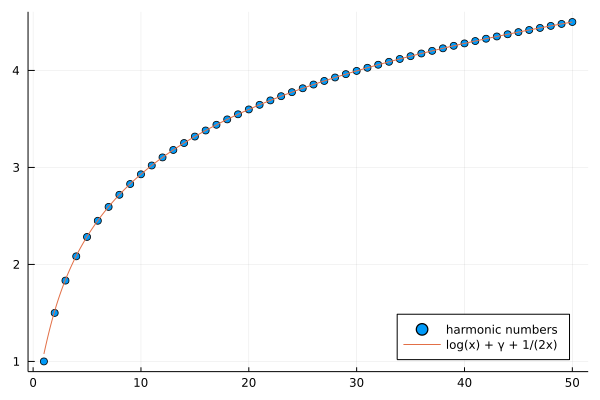

In [7]:
using Base.MathConstants: γ
using Plots

harmonic_approx(x) = log(x) + γ + 1/(2x)

n = 1:50
x = range(extrema(n)...; length=1000)
plot(; legend=:bottomright)
scatter!(n, harmonic_naive.(n); label="harmonic numbers")
plot!(x, harmonic_approx.(x); label="log(x) + γ + 1/(2x)")

In [8]:
[(n, harmonic_approx(n) - harmonic_naive(n)) for n in 1:20]

20-element Vector{Tuple{Int64, Float64}}:
 (1, 0.07721566490153275)
 (2, 0.020362845461478152)
 (3, 0.00916128690297624)
 (4, 0.005176692688090512)
 (5, 0.0033202440023001323)
 (6, 0.0023084674629214597)
 (7, 0.0016972425282753)
 (8, 0.001300063724225975)
 (9, 0.0010275438250539892)
 (10, 0.0008325039273247015)
 (11, 0.0006881382771042333)
 (12, 0.0005783031455215415)
 (13, 0.0004928056908526379)
 (14, 0.00042495366874995)
 (15, 0.00037020610808236043)
 (16, 0.0003253939123202265)
 (17, 0.0002882510228729984)
 (18, 0.0002571223791609789)
 (19, 0.0002307763979745303)
 (20, 0.00020828131184114085)

In [9]:
harmonic_approx2(x) = log(x) + γ + 1/(2x) - 1/(12x^2)

[(n, harmonic_approx2(n) - harmonic_naive(n)) for n in 1:20]

20-element Vector{Tuple{Int64, Float64}}:
 (1, -0.006117668431800616)
 (2, -0.00047048787185510754)
 (3, -9.797235628306034e-5)
 (4, -3.164064524296961e-5)
 (5, -1.3089331033278029e-5)
 (6, -6.347351893420949e-6)
 (7, -3.437743833600848e-6)
 (8, -2.019609107506426e-6)
 (9, -1.2627593082292776e-6)
 (10, -8.294060087621347e-7)
 (11, -5.669570555255632e-7)
 (12, -4.0055818217865635e-7)
 (13, -2.909560903319175e-7)
 (14, -2.1639927716421425e-7)
 (15, -1.642622882158662e-7)
 (16, -1.2692101325484373e-7)
 (17, -9.961149860515661e-8)
 (18, -7.926692946469416e-8)
 (19, -6.386056661256134e-8)
 (20, -5.20214920030071e-8)